In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

Проектная работа по модулю “Математика и статистика в Python”
1.Загрузить файл hr.csv.
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3.Рассчитать и визуализировать корреляционную матрицу для переменных.
-4.Визуализировать несколько взаимосвязей между переменными.
5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6.Рассчитать сколько работников работает в каждом департаменте.
7.Показать распределение сотрудников по зарплатам.
8.Показать распределение сотрудников по зарплатам совместно с департаментами.
9.Сколько сотрудников покинули компанию.
10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [74]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
#url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv('HR.csv')

In [75]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [76]:
df.info()
# Видим, что количество элементов одинаково в каждой строке, отсутствуют пропуски значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [77]:
# Рассмотрим переменную - satisfaction_level
satisfaction = df['satisfaction_level']
num_satisfaction = len(satisfaction)
sorted_satisfaction = sorted(satisfaction)
middle = (num_satisfaction//2) 
# мы знаем что значения строк не четное, поэтому получаем значение среднего инекса
result = sorted_satisfaction[middle]
    
print('Медиана: ', result)
print('Среднее значение:', sum(satisfaction)/num_satisfaction)

# Вычислим значение моды 
counts_satisfaction = {} # создали словарь для сбора повторяющий значений 
for par in satisfaction:
    if par not in counts_satisfaction:
        counts_satisfaction[par] = 1
    else:
        counts_satisfaction[par] += 1
# Находим значение с максимальным повторением
maxrep = 0
mode_satisfaction = None
for k, v in counts_satisfaction.items():
    if maxrep < v:
        maxrep = v
        mode_satisfaction = k
print('Значение мода: ', mode_satisfaction, 'Количество встречаемости: ', maxrep)



Медиана:  0.64
Среднее значение: 0.6128335222348166
Значение мода:  0.1 Количество встречаемости:  358


In [78]:
# Получим значения статистики через статистические формулы
print('Статистические данные переменной - satisfaction_level')
data = df['satisfaction_level']
print('Медиана: ', statistics.median(data))
print('Среднее значение:', statistics.mean(data))
print('Значение мода: ', statistics.mode(data))
print('Минимальное значение: ' , min(data))
print('Максимальное значение:' , max(data))
print('Стандартное отклонение: ' , statistics.pstdev(data))

Статистические данные переменной - satisfaction_level
Медиана:  0.64
Среднее значение: 0.6128335222348157
Значение мода:  0.1
Минимальное значение:  0.09
Максимальное значение: 1.0
Стандартное отклонение:  0.2486223626820733


In [79]:
print('Статистические данные переменной - last_evaluation')
data = df['last_evaluation']
print('Медиана: ', statistics.median(data))
print('Среднее значение:', statistics.mean(data))
print('Значение мода: ', statistics.mode(data))
print('Минимальное значение: ' , min(data))
print('Максимальное значение:' , max(data))
print('Стандартное отклонение: ' , statistics.pstdev(data))

Статистические данные переменной - last_evaluation
Медиана:  0.72
Среднее значение: 0.7161017401160077
Значение мода:  0.55
Минимальное значение:  0.36
Максимальное значение: 1.0
Стандартное отклонение:  0.1711634045107436


In [80]:
print('Статистические данные переменной - number_project')
data = df['number_project']
print('Медиана: ', statistics.median(data))
print('Среднее значение:', statistics.mean(data))
print('Значение мода: ', statistics.mode(data))
print('Минимальное значение: ' , min(data))
print('Максимальное значение:' , max(data))
print('Стандартное отклонение: ' , statistics.pstdev(data))

Статистические данные переменной - number_project
Медиана:  4
Среднее значение: 3.80305353690246
Значение мода:  4
Минимальное значение:  2
Максимальное значение: 7
Стандартное отклонение:  1.2325512654823438


In [84]:
"""""
Значение мода не уникально. НО поробуем ниже сделать расчет самостоятельно.

"""""

print('Статистические данные переменной - average_montly_hours')
data = df['average_montly_hours']
print('Медиана: ', statistics.median(data))
print('Среднее значение:', statistics.mean(data))
#print('Значение мода: ', statistics.mode(data))# 
print('Минимальное значение: ' , min(data))
print('Максимальное значение:' , max(data))
print('Стандартное отклонение: ' , statistics.pstdev(data))

Статистические данные переменной - average_montly_hours
Медиана:  200
Среднее значение: 201.0503366891126
Минимальное значение:  96
Максимальное значение: 310
Стандартное отклонение:  49.94143446256218


In [82]:
# Вычислим значение мода 
average_montly_hours =df['average_montly_hours']
counts_ = {} # создали словарь для сбора повторяющий значений 
for par in average_montly_hours:
    if par not in counts_:
        counts_[par] = 1
    else:
        counts_[par] += 1
# Находим значение с максимальным повторением
maxrep = 0
mode_ = None
for k, v in counts_.items():
    if maxrep < v:
        maxrep = v
        mode_ = k
print('Значение мода: ', mode_, 'Количество встречаемости: ', maxrep)

# Значение мода получили!

Значение мода:  135 Количество встречаемости:  153


Text(0, 0.5, 'frequency')

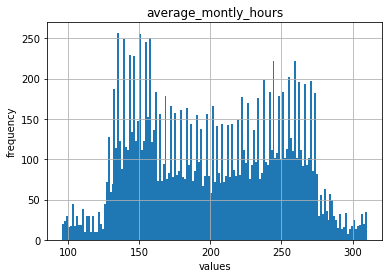

In [11]:
ax = df.average_montly_hours.hist(bins=155)

""""
Уменьшили интервал и получили наглядное подверждение, что мода =135, видимо чаще других встречается с минимальным преимуществом. 

"""""

ax.set_title('average_montly_hours')
ax.set_xlabel('values')
ax.set_ylabel('frequency')

In [12]:
print('Статистические данные переменной - time_spend_company')
data = df['time_spend_company']
print('Медиана: ', statistics.median(data))
print('Среднее значение:', statistics.mean(data))
print('Значение мода: ', statistics.mode(data))
print('Минимальное значение: ' , min(data))
print('Максимальное значение:' , max(data))
print('Стандартное отклонение: ' , statistics.pstdev(data))

Статистические данные переменной - time_spend_company
Медиана:  3
Среднее значение: 3.498233215547703
Значение мода:  3
Минимальное значение:  2
Максимальное значение: 10
Стандартное отклонение:  1.4600875552715114


In [85]:
""""
Данные "Work_accident" - номинативные и бинарные. Приминают два значения 0 и 1. (Минимальное и максимальное).  

Статистические данные при таких значениях не  информативны.
Мы можем посмотреть частоту их встречаемости .

"""""
print('Статистические данные переменной - Work_accident')
data = df['Work_accident']
print('Среднее значение:', statistics.mean(data))
print('Значение мода: ', statistics.mode(data))
print('Стандартное отклонение: ' , statistics.pstdev(data))

df['Work_accident'].value_counts()
# Мы видим,что несчастных случаев в компании было - 2169, что составляет 14,46%

Статистические данные переменной - Work_accident
Среднее значение: 0.1446096406427095
Значение мода:  0
Стандартное отклонение:  0.3517068274513532


0    12830
1     2169
Name: Work_accident, dtype: int64

In [86]:
""""
Данные "left" - номинативные и бинарные. Приминают два значения 0 и 1. (Минимальное и максимальное).  
из значения mode мы видим только то, что  чаще сотрудники уходили сами, чем их увольняли.

Статистические данные при таких значениях не  информативны.
Мы можем посмотреть частоту их встречаемости .

"""""

print('Статистические данные переменной - left')
data = df['left']

print('Значение мода: ', statistics.mode(data))
print('Стандартное отклонение: ' , statistics.pstdev(data))

df['left'].value_counts()

# Видно, что количество покинувших компанию  (3571) составлет 23,8% от всех сотрудников

Статистические данные переменной - left
Значение мода:  0
Стандартное отклонение:  0.42590990072709495


0    11428
1     3571
Name: left, dtype: int64

In [87]:
""""
Данные "promotion_last_5years" - номинативные и бинарные. Приминают два значения 0 и 1. (Минимальное и максимальное).  
из значения mode мы видим только то, что  чаще не повышали по должности.

Статистические данные при таких данных не  информационны.
Мы можем посмотреть частоту их встречаемости .

"""""

print('Статистические данные переменной - promotion_last_5years')
data = df['promotion_last_5years']

print('Среднее значение:', statistics.mean(data))
print('Значение мода: ', statistics.mode(data))

print('Стандартное отклонение: ' , statistics.pstdev(data))

df['promotion_last_5years'].value_counts()

# Результат показывает, что 2,13% (319)  сотрудников получили повышение за последние 5 лет.

Статистические данные переменной - promotion_last_5years
Среднее значение: 0.021268084538969265
Значение мода:  0
Стандартное отклонение:  0.14427665479561314


0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [88]:
""""
Данные "sales" - не количественные, они номинативные,  Принимают несколько заданных значений  
Посмотрим сколько отделов всего и сколько человек работают в каждом отделе
"""""

#df.groupby('sales')[['salary']].count().sort_values('salary', ascending=False)
sales_empl = df['sales'].value_counts()
sales_empl

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [89]:
col_dep = df.groupby('sales')[['left']].sum()\
    .sort_values('left', ascending=False)
    
col_dep.head(20)
# 25% и более  сотрудников уходят из отделов sales, technical, support, hr, accounting, marketing

,left
sales,
sales,1014
technical,697
support,555
IT,273
hr,215
accounting,204
marketing,203
product_mng,198
RandD,121


In [90]:
""""
Показано распределение в каждом отделе по уровню зп и количеству сотрудников
"""""
df.groupby(['sales','salary']).count().head(30)
            

satisfaction_level  last_evaluation  number_project  \
sales       salary                                                        
IT          high                    83               83              83   
            low                    609              609             609   
            medium                 535              535             535   
RandD       high                    51               51              51   
            low                    364              364             364   
            medium                 372              372             372   
accounting  high                    74               74              74   
            low                    358              358             358   
            medium                 335              335             335   
hr          high                    45               45              45   
            low                    335              335             335   
            medium                 359              359             359   
management  high                   225              225             225   
            low                    180              180             180   
            medium                 225              225             225   
marketing   high                    80               80              80   
            low                    402              402             402   
            medium                 376              376             376   
product_mng high                    68               68              68   
            low                    451              451             451   
            medium                 383              383             383   
sales       high                   269              269             269   
            low                   2099             2099            2099   
            medium                1772             1772            1772   
support     high                   141              141             141   
            low                   1146             1146            1146   
            medium                 942              942             942   
technical   high                   201              201             201   
            low                   1372             1372            1372   
            medium                1147             1147            1147   

                    average_montly_hours  time_spend_company  Work_accident  \
sales       salary                                                            
IT          high                      83                  83             83   
            low                      609                 609            609   
            medium                   535                 535            535   
RandD       high                      51                  51             51   
            low                      364                 364            364   
            medium                   372                 372            372   
accounting  high                      74                  74             74   
            low                      358                 358            358   
            medium                   335                 335            335   
hr          high                      45                  45             45   
            low                      335                 335            335   
            medium                   359                 359            359   
management  high                     225                 225            225   
            low                      180                 180            180   
            medium                   225                 225            225   
marketing   high                      80                  80             80   
            low                      402                 402            402   
            medium                   376                 376            376   
product_mng high                      6

In [91]:
""""
Показано сколько сотрудников получают какую зп в каждом департаменте. 
"""""
df.groupby(['salary','sales']).count().head(30)
            

satisfaction_level  last_evaluation  number_project  \
salary sales                                                              
high   IT                           83               83              83   
       RandD                        51               51              51   
       accounting                   74               74              74   
       hr                           45               45              45   
       management                  225              225             225   
       marketing                    80               80              80   
       product_mng                  68               68              68   
       sales                       269              269             269   
       support                     141              141             141   
       technical                   201              201             201   
low    IT                          609              609             609   
       RandD                       364              364             364   
       accounting                  358              358             358   
       hr                          335              335             335   
       management                  180              180             180   
       marketing                   402              402             402   
       product_mng                 451              451             451   
       sales                      2099             2099            2099   
       support                    1146             1146            1146   
       technical                  1372             1372            1372   
medium IT                          535              535             535   
       RandD                       372              372             372   
       accounting                  335              335             335   
       hr                          359              359             359   
       management                  225              225             225   
       marketing                   376              376             376   
       product_mng                 383              383             383   
       sales                      1772             1772            1772   
       support                     942              942             942   
       technical                  1147             1147            1147   

                    average_montly_hours  time_spend_company  Work_accident  \
salary sales                                                                  
high   IT                             83                  83             83   
       RandD                          51                  51             51   
       accounting                     74                  74             74   
       hr                             45                  45             45   
       management                    225                 225            225   
       marketing                      80                  80             80   
       product_mng                    68                  68             68   
       sales                         269                 269            269   
       support                       141                 141            141   
       technical                     201                 201            201   
low    IT                            609                 609            609   
       RandD                         364                 364            364   
       accounting                    358                 358            358   
       hr                            335                 335            335   
       management                    180                 180            180   
       marketing                     402                 402            402   
       product_mng                   451                 451            451   
       sales                        2099                2099           2099   
       support                      114

In [92]:
""""
Данные "salary" - не количественные, они номинативные,  Принимают несколько заданных значений  
Посмотрим сколько уровней зп есть  и сколько человек находятся на каждом уровне.
"""""

df_sal_count = df.groupby('salary')[['promotion_last_5years']].count().sort_values('promotion_last_5years', ascending=False)
df_sal_count.rename(columns={'promotion_last_5years': 'empoy'}, inplace=True)
df_sal_count

,empoy
salary,
low,7316
medium,6446
high,1237


In [93]:
""""  
Посмотрим какой процент уволенных на каждом уровне зп.
"""""

df_sal_left = df.groupby('salary')[['left']].sum().sort_values('left', ascending=False)
df_sal_left = df_sal_left.join(df_sal_count)

In [94]:
def persent(df_sal_left):
    return ((df_sal_left['left']/df_sal_left['empoy'])*100 )

In [95]:
df_sal_left['persent']=df_sal_left.apply(persent,axis=1)
df_sal_left

#      Количество уволенных больше среди сотрудников с зп low

,left,empoy,persent
salary,,,
low,2172,7316,29.688354
medium,1317,6446,20.431275
high,82,1237,6.628941


In [96]:
""""
Посмотрим в каком депортаменте и с какой зп больше всего сотрудников покинувших компанию
"""""
df.groupby(['sales','salary'])[['left']].sum()\
    .sort_values('left', ascending=False)

#  Больше всего ушли с отделов sales,support и technical, но это самые многочисленные отделы. 
#  Другой вывод, на мой взгляд более интереснее, что людий уходят в большем количестве с меньшей зп

,,left
sales,salary,
sales,low,697
support,low,389
technical,low,378
sales,medium,303
technical,medium,294
IT,low,172
support,medium,158
marketing,low,126
hr,medium,117


In [97]:
""""
Можно посмотреть статистические данные в единой таблице. Здесь мы дополнительно видем распределение значений в квартилях
"""""

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


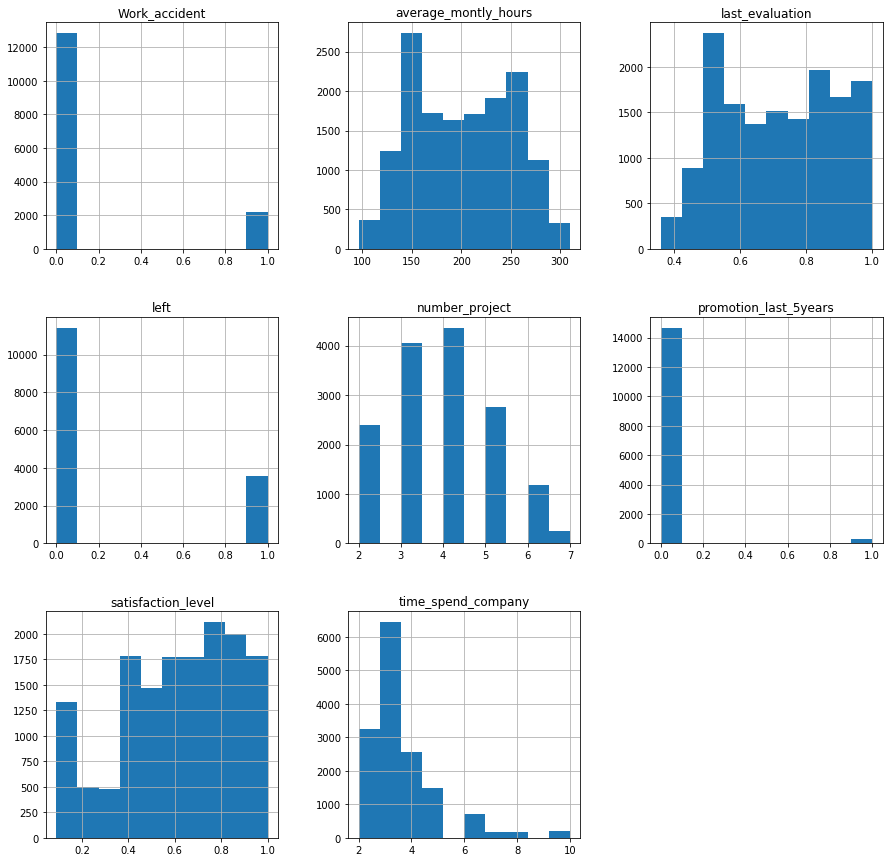

In [98]:
# Общее представление как распределены наши даннные
df.hist(figsize=(15,15))
plt.show()


- Из графиков видно, что значения в Work_accident, left и  promotion_last_5years  (дискретные). Принимают значения 0 или 1- распределение Бернули. 

- Распределение данных(дискретные)  из столбца number_project похоже на биноминальное. 

- По другим выборкам, утверждать какое распределение - сложно. 


### 2. Рассчитать и визуализировать корреляционную матрицу для переменных. 

In [99]:
import seaborn as sns

In [100]:
corr_matrix = df.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


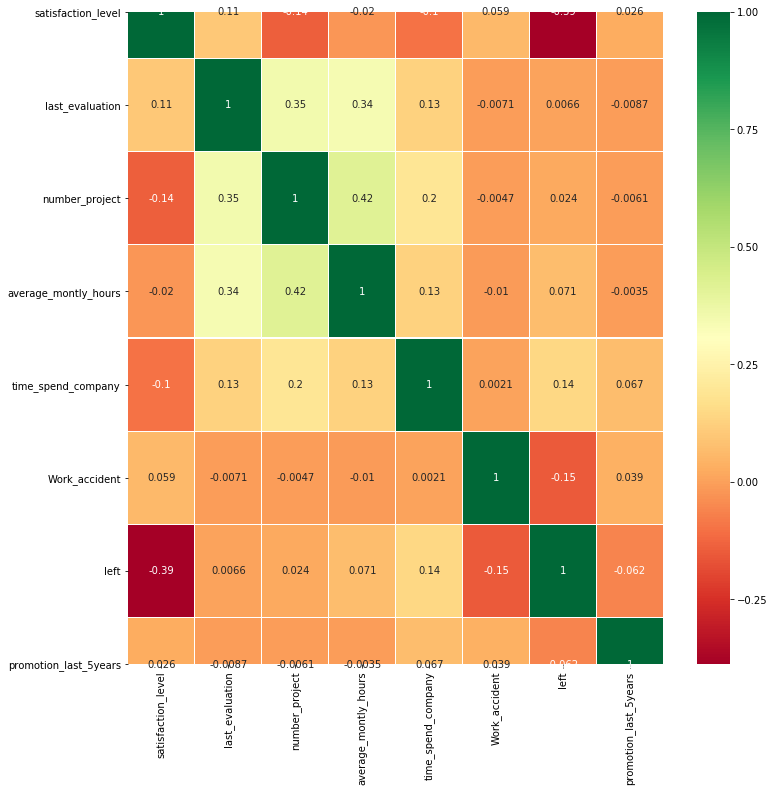

In [101]:
#  Визуализируем корреляционную матрицу 

sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 

fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Сильную корреляцию между параметрами здесь не видно. Скорей наоборот -  есть практически совсем не зависимые данные (слабая корреляция) такие как time_spend_company и Work_accident(0,0021); promotion_last_5years и average_montly_hours (-0,0035); promotion_last_5years и number_project (-0,0061); 

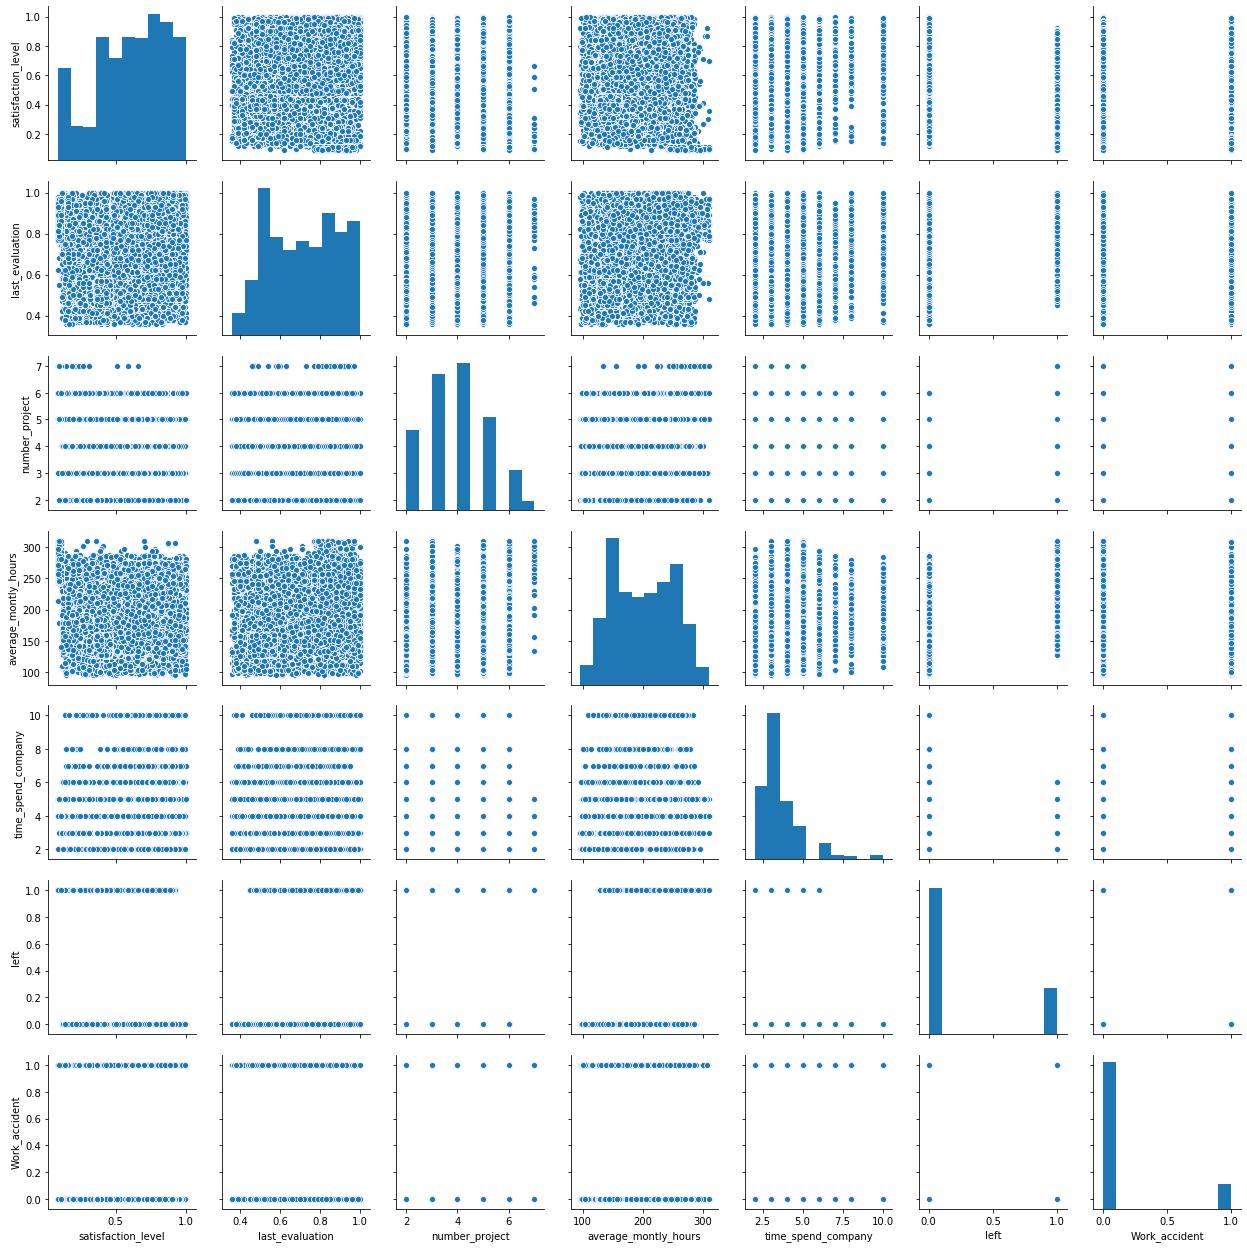

In [102]:
# 4.Визуализировать несколько взаимосвязей между переменными.
""""
Выберем наиболее коррелирующие параметры, а точне уберем promotion_last_5years,
данные из этой выборки практически не коррелируют с другими данными
"""""

sns.pairplot(df,vars=['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
                      'time_spend_company','left', 'Work_accident'])

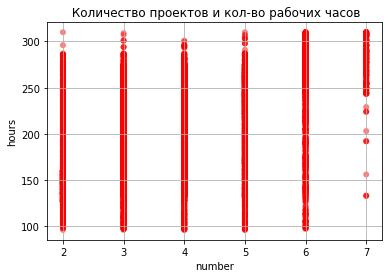

In [103]:
 
# 4.1 (satisfaction_level and average_montly_hours)

number = df['number_project']# 
hours = df['average_montly_hours'] 
fig, ax = plt.subplots()
ax.scatter(number, hours, c='red', alpha=0.5, edgecolors='none')

ax.grid(True)
plt.xlabel('number')
plt.ylabel('hours')
plt.title(' Количество проектов и кол-во рабочих часов')
plt.show()

Из графика видно, что количество проектов более 6 занимает у сотрудника времени практически всегда больше среднего. 

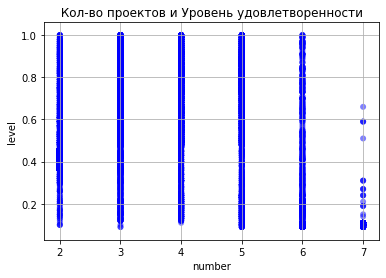

In [104]:
# 4.Визуализировать несколько взаимосвязей между переменными. 
# 4.2 (satisfaction_level and average_montly_hours)

number = df['number_project']# 
level = df['satisfaction_level'] 
fig, ax = plt.subplots()
ax.scatter(number, level, c='blue', alpha=0.5, edgecolors='none')

ax.grid(True)
plt.xlabel('number')
plt.ylabel('level')
plt.title(' Кол-во проектов и Уровень удовлетворенности ')
plt.show()

Когда у сотрудника проектов больше 6, он не доволен работой . 

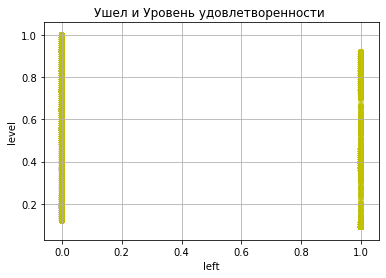

In [105]:
# 4.3 (satisfaction_level and average_montly_hours)

left = df['left'] 
level = df['satisfaction_level'] 
fig, ax = plt.subplots()
ax.scatter(left, level,c='y', alpha=0.5, edgecolors='none')

ax.grid(True)
plt.xlabel('left')
plt.ylabel('level')
plt.title('Ушел и Уровень удовлетворенности ')
plt.show()

In [106]:
Среди сотрудников, покинувших компанию есть с разным уровнем удовлетворенности работой,но отсутствуют те, кто был доволен работой.  

SyntaxError: invalid syntax (<ipython-input-106-dc0361da1f55>, line 1)

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [ ]:
# проверим взаимосвязь между average_montly_hours и last_evaluation
sts.shapiro(df['last_evaluation'])

 # Стремится к 1, но не сильно. Будем брать большие выборки

In [ ]:
sts.shapiro(df['average_montly_hours'])

In [ ]:
# Посмотрим на дисперсию. Она должна быть равна.
statistics.variance(df['last_evaluation']), statistics.variance(df['average_montly_hours'])

In [ ]:
# Дисперсия не равна, поэтому применяем t - тест Уэлча (equal_var=False)
sts.ttest_ind(df['last_evaluation'],df['average_montly_hours'], equal_var=False )

p-value  равно 0, t-value отрицательно большое значение. Мы можем говорить , что данные одной переменной не имеют взаимосвязь с другой перменной. 
Убедимся в этом и с помощью графиков. 

In [ ]:
sns.distplot(df['last_evaluation'], 5)
sns.distplot(df['average_montly_hours'], 5)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['last_evaluation', 'average_montly_hours'])
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['last_evaluation'], df['average_montly_hours'],c='r', alpha=0.5, edgecolors='none')

ax.grid(True)
plt.xlabel('evaluation')
plt.ylabel('average_montly_hours')
plt.title('Оценка и кол-во часов на работе')
plt.show()

#### 10. Проверим наше выше сказанное заключение на гипотезе. 
### Предположим, что у сотрудников покинувших компанию уровень удовлетворенности такой же как и у работающий.

#### Одна переменная номинативная, вторая- количественная

In [ ]:
"""""
Распределение переменных не  нормально. Применять t-test можем, но при больших выборках
"""""
sts.shapiro(df['satisfaction_level'])



In [ ]:
from scipy.stats import shapiro
alpha = 0.05
stat, p = shapiro(df['satisfaction_level'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
# 
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

In [ ]:
#  еще раз построили график и убедились что распределение не нормально
plt.hist(df['satisfaction_level'], 100)
plt.show()

In [107]:
"""""
Создаем две выборки соответственно нашей гепотезе.
"""""
left = df[df['left']== 1]['satisfaction_level']
left_no = df[df['left']== 0]['satisfaction_level']

In [108]:
len(left), len(left_no)

# Разная длина. Следует уровнять

(3571, 11428)

In [109]:
 # используем большое количество выборки
left = left.sample(3000)
left_no = left_no.sample(3000)

In [110]:
# Посмотрим на дисперсию. Она должна быть равна.
statistics.variance(left), statistics.variance(left_no)

(0.06916233673446705, 0.04720626924530399)

In [111]:
# Дисперсия не равна, поэтому применяем t - тест Уэлча (equal_var=False)
sts.ttest_ind(left,left_no, equal_var=False )

Ttest_indResult(statistic=-37.39809606912314, pvalue=2.153737020327868e-274)

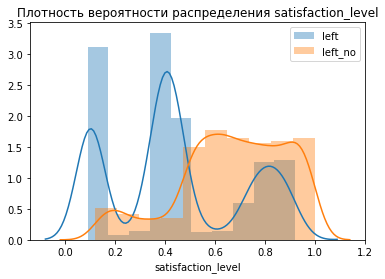

In [112]:
sns.distplot(left, 10)
sns.distplot(left_no, 10)
plt.title('Плотность вероятности распределения satisfaction_level')
plt.legend(['left', 'left_no'])
plt.show()

 p-value практически равно 0, t-value отрицательно большое значение.   Мы не принимаем нулевую гипотезу и можем сказать, что  имеется статистически значимые различия в уровне удовлетворенности между покинувшими компанию сотрудников и работающими .

### Сделаем еще одно предположение- гипотезу: что ушедшие сотрудники имели оценку такую же, что и оставшие. 

In [113]:
"""""
Проверяем Распределение переменных. Оно не нормальному. Применять t-test можем в случае большой выборки.
"""""
sts.shapiro(df['last_evaluation'])



(0.9522111415863037, 0.0)

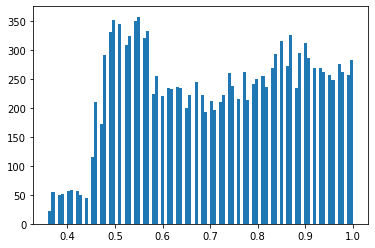

In [114]:
#  еще раз построили график и убедились что распределение не нормально
plt.hist(df['last_evaluation'], 100)
plt.show()

In [115]:
"""""
Создаем две выборки для нашей гепотезе.
"""""
left_ev = df[df['left']== 1]['last_evaluation']
left_no_ev = df[df['left']== 0]['last_evaluation']

In [116]:
len(left_ev), len(left_no_ev)

(3571, 11428)

In [117]:
left_ev = left_ev.sample(3000)
left_no_ev = left_no_ev.sample(3000)

In [118]:
# Посмотрим на дисперсию. 
statistics.variance(left_ev), statistics.variance(left_no_ev)

(0.03919423673446704, 0.025749745904190286)

In [119]:
# Дисперсия не равна, поэтому применяем t - тест Уэлча (equal_var=False)
sts.ttest_ind(left_ev,left_no_ev, equal_var=False )

Ttest_indResult(statistic=-0.22065848405270436, pvalue=0.825366191741125)

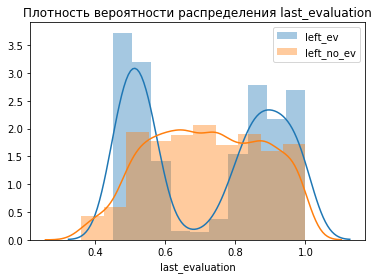

In [120]:
sns.distplot(left_ev, 10)
sns.distplot(left_no_ev, 10)
plt.title('Плотность вероятности распределения last_evaluation')
plt.legend(['left_ev', 'left_no_ev'])
plt.show()

 t -value  меньше 1, pvalue > 0,05   Я не могу отклонить эту гипотезу. У группы покинувших компанию и оставшихся статистически значимых различий в оценке их работы мы не получили.  

### Я попробую получить несколько причин - почему люди уходят из компании

In [121]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [122]:
""""
Выше я получили информацию, что большее количество людей (и процент выше) уходит их самых многочисленных отделов, 
таких как 'sales', 'support','technical' и с уровнем зп 'low', 'medium'. 
Уменьше наш дф с учетом этих выводов и попробую еще дальше посмотреть (найти) зависимость
 Заменю номинативные значения на количественные

"""""

df_anal = df[df['sales'].isin(['sales', 'support','technical'])]
df_anal.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [123]:
df_anal = df_anal[df_anal['salary'].isin(['low', 'medium'])]
df_anal.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [124]:
# Заменим булевые значения на количественные
def chage (par):
    if par == 'sales':
        return 1
    if par == 'support':
        return 2
    if par == 'technical':
        return 3 

In [125]:
df_anal.sales = df_anal['sales'].apply(chage)
df_anal.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,1,low
1,0.80,0.86,5,262,6,0,1,0,1,medium
2,0.11,0.88,7,272,4,0,1,0,1,medium
3,0.72,0.87,5,223,5,0,1,0,1,low
4,0.37,0.52,2,159,3,0,1,0,1,low


In [126]:
# Заменим номинативные значения на количественные
def chage_2 (par):
    if par == 'low':
        return 1
    if par == 'medium':
        return 2

In [127]:
df_anal.salary = df_anal['salary'].apply(chage_2)
df_anal.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,1,1


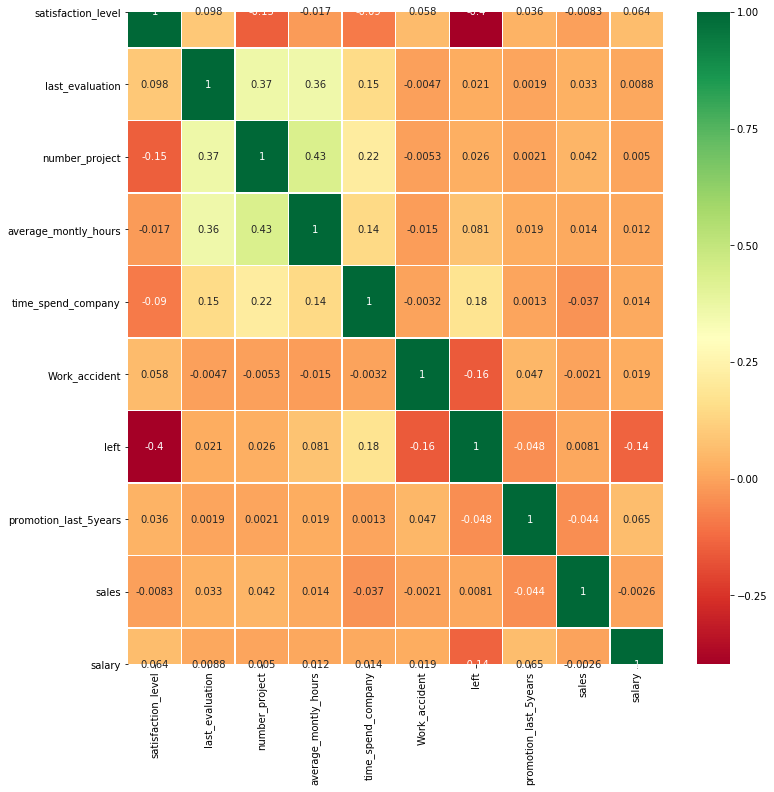

In [128]:
sns.heatmap(df_anal.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 

fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [129]:
# а посмотрим на корреляционную матрицу общую. Будут ли отличия
df.sales = df['sales'].apply(chage)
df.salary = df['salary'].apply(chage_2)

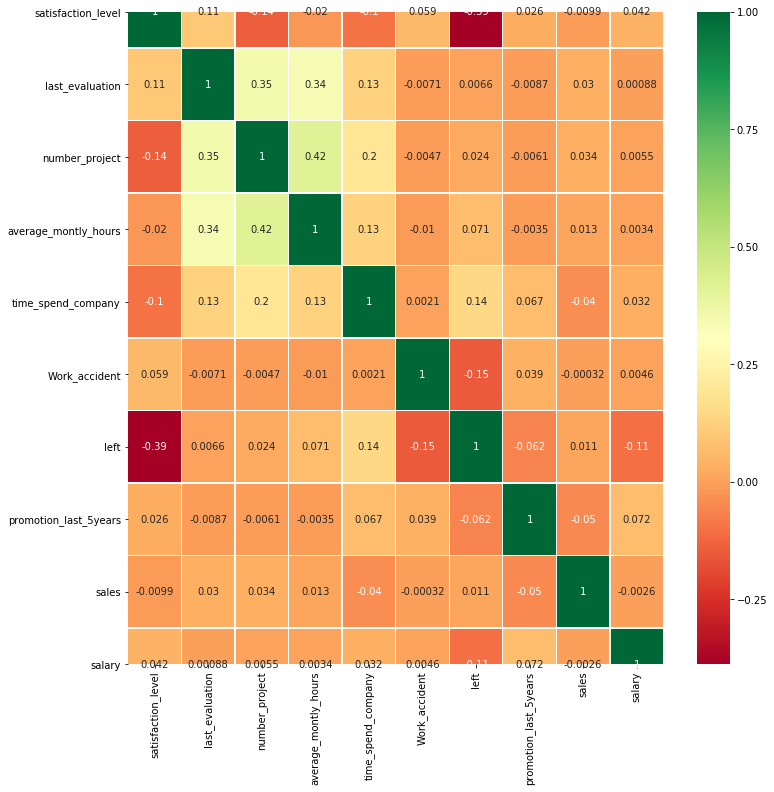

In [130]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 

fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

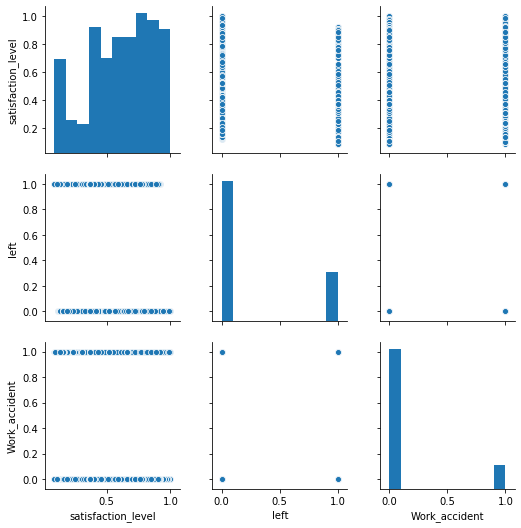

In [131]:
# Думаю, правильно, что сократила выборку- зависимость стала более выраженной, судя по корреляционной матрице, по графику не очень видно. 
sns.pairplot(df_anal,vars=['satisfaction_level', 'left', 'Work_accident'])

In [132]:
df_anal_time = df_anal.groupby('time_spend_company')[['left']].sum()\
    .sort_values('left', ascending=False)
    
df_anal_time.head(20)

#  Видим, что не в первый год люди уходят

,left
time_spend_company,
3,964
4,553
5,520
6,139
2,43
7,0
8,0
10,0


In [133]:
df_anal = df_anal.groupby('time_spend_company')[['promotion_last_5years']].sum()\
    .sort_values('promotion_last_5years', ascending=False)
    
df_anal.head(20)

,promotion_last_5years
time_spend_company,
3,66
2,26
4,18
5,10
7,8
6,7
8,0
10,0


### Видим, что повышение по службе начинается с 3 года работы и основной поток уволенных идет с 3 года. Я думаю, что могу сделать вывод, что увольняются сотрудники , которые расчитывает на повышение по службе и повышение зп, но если это не происходит на 3 год, у них появляется недовольство работой и они начинают присматривать другую работу и как следствие увольняются. 